Задание 1

Изначальный многогранник:
 [[0 0 0 1]
 [0 0 1 1]
 [3 0 1 1]
 [3 2 1 1]
 [0 2 1 1]
 [3 0 0 1]
 [3 2 0 1]
 [0 2 0 1]]
Повернутый многогранник (90, у):
 [[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  0.0000000e+00  6.1232340e-17  1.0000000e+00]
 [ 1.0000000e+00  0.0000000e+00 -3.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  2.0000000e+00 -3.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  2.0000000e+00  6.1232340e-17  1.0000000e+00]
 [ 1.8369702e-16  0.0000000e+00 -3.0000000e+00  1.0000000e+00]
 [ 1.8369702e-16  2.0000000e+00 -3.0000000e+00  1.0000000e+00]
 [ 0.0000000e+00  2.0000000e+00  0.0000000e+00  1.0000000e+00]]
Повернутый многогранник (90, х):
 [[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]
 [ 0.0000000e+00 -1.0000000e+00  6.1232340e-17  1.0000000e+00]
 [ 3.0000000e+00 -1.0000000e+00  6.1232340e-17  1.0000000e+00]
 [ 3.0000000e+00 -1.0000000e+00  2.0000000e+00  1.0000000e+00]
 [ 0.0000000e+00 -1.0000000e+00  2.0000000e+00  1.0000000e+

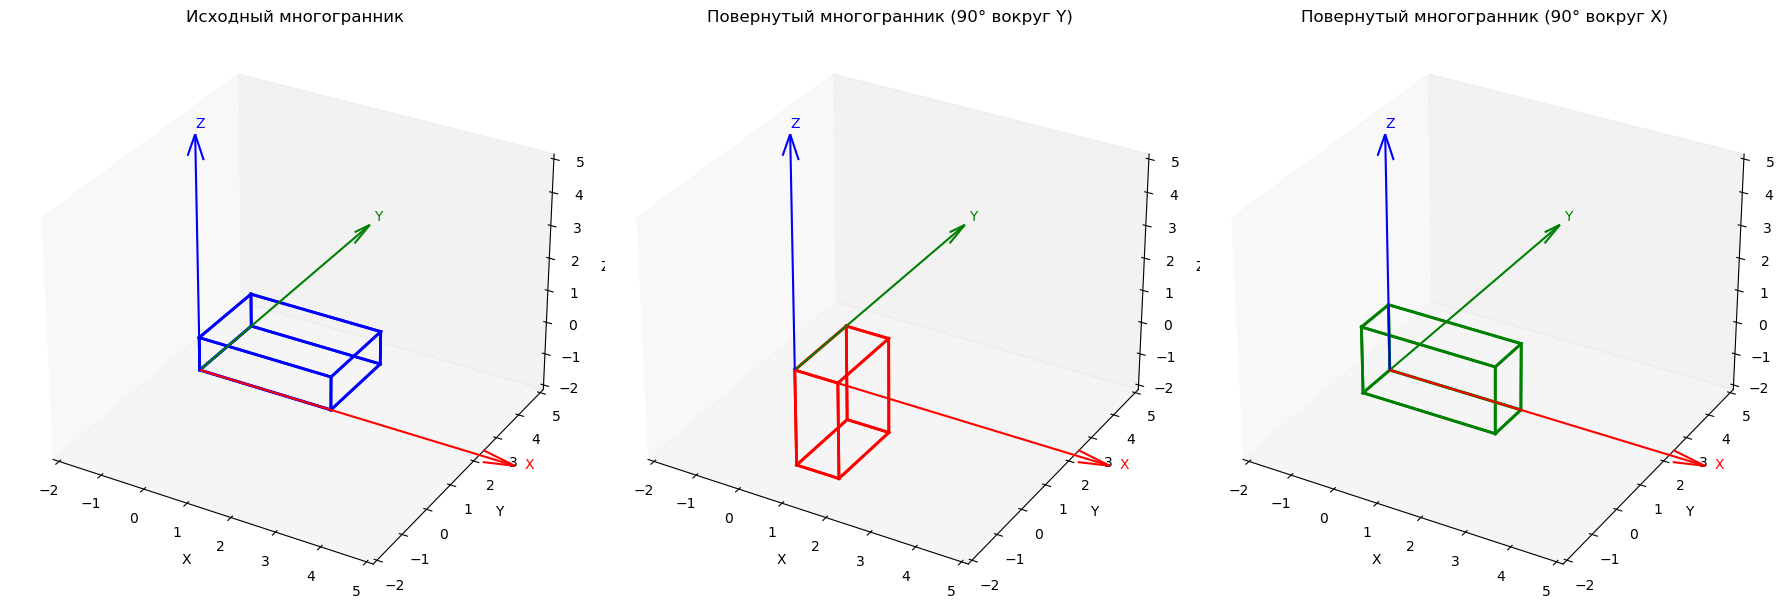

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import numpy as np

# Задаем вершины многогранника с дополнительной координатой
vertices = np.array([
    [0, 0, 0, 1],
    [0, 0, 1, 1],
    [3, 0, 1, 1],
    [3, 2, 1, 1],
    [0, 2, 1, 1],
    [3, 0, 0, 1],
    [3, 2, 0, 1],
    [0, 2, 0, 1]
])

# Определяем грани многогранника, каждая грань состоит из индексов вершин
faces = [
    [1, 2, 3, 4],
    [2, 5, 6, 3],
    [5, 0, 7, 6],
    [0, 1, 4, 7],
    [4, 3, 6, 7],
    [0, 5, 2, 1]
]

print("Изначальный многогранник:\n", vertices)

# Функция для поворота многогранника
def rotate(vertices, angle, axis):
    theta = np.radians(angle)
    if axis == 'x':
        rotation_matrix = np.array([
            [1, 0, 0, 0],
            [0, np.cos(theta), -np.sin(theta), 0],
            [0, np.sin(theta), np.cos(theta), 0],
            [0, 0, 0, 1]
        ])
    elif axis == 'y':
        rotation_matrix = np.array([
            [np.cos(theta), 0, np.sin(theta), 0],
            [0, 1, 0, 0],
            [-np.sin(theta), 0, np.cos(theta), 0],
            [0, 0, 0, 1]
        ])
    elif axis == 'z':
        rotation_matrix = np.array([
            [np.cos(theta), -np.sin(theta), 0, 0],
            [np.sin(theta), np.cos(theta), 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1]
        ])
    else:
        raise ValueError("Axis must be 'x', 'y', or 'z'.")
    
    return vertices @ rotation_matrix.T

# Поворачиваем многогранник на 90 градусов вокруг оси Y
rotated_vertices = rotate(vertices, 90, 'y')
print("Повернутый многогранник (90, у):\n", rotated_vertices)

# Создаем фигуру с подграфиками
fig = plt.figure(figsize=(18, 6))

# График 1: Исходный многогранник
ax1 = fig.add_subplot(131, projection='3d')

#print("Вершины исходного многогранника:")
for face in faces:
    for i in range(len(face)):
        start = face[i]
        end = face[(i + 1) % len(face)]
        x_coords = vertices[[start, end], 0]
        y_coords = vertices[[start, end], 1]
        z_coords = vertices[[start, end], 2]
        #print(x_coords, y_coords, z_coords)
        ax1.plot(x_coords, y_coords, z_coords, color='b', linewidth=2)

ax1.set_title('Исходный многогранник')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_xlim([-2, 5])
ax1.set_ylim([-2, 5])
ax1.set_zlim([-2, 5])

# График 2: Повернутый многогранник
ax2 = fig.add_subplot(132, projection='3d')

#print("Вершины второго многогранника:")
for face in faces:
    for i in range(len(face)):
        start = face[i]
        end = face[(i + 1) % len(face)]
        x_coords = rotated_vertices[[start, end], 0]
        y_coords = rotated_vertices[[start, end], 1]
        z_coords = rotated_vertices[[start, end], 2]
        #print(x_coords, y_coords, z_coords)
        ax2.plot(x_coords, y_coords, z_coords, color='r', linewidth=2)

ax2.set_title('Повернутый многогранник (90° вокруг Y)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim([-2, 5])
ax2.set_ylim([-2, 5])
ax2.set_zlim([-2, 5])

# График 3
ax3 = fig.add_subplot(133, projection='3d')

y_rotated_vertices = rotate(vertices, 90, 'x')
print("Повернутый многогранник (90, х):\n", y_rotated_vertices)

#print("Вершины третьего многогранника:")
for face in faces:
    for i in range(len(face)):
        start = face[i]
        end = face[(i + 1) % len(face)]
        x_coords = y_rotated_vertices[[start, end], 0]
        y_coords = y_rotated_vertices[[start, end], 1]
        z_coords = y_rotated_vertices[[start, end], 2]
        #print(x_coords, y_coords, z_coords)
        ax3.plot(x_coords, y_coords, z_coords, color='g', linewidth=2)

ax3.set_title('Повернутый многогранник (90° вокруг X)')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.set_xlim([-2, 5])
ax3.set_ylim([-2, 5])
ax3.set_zlim([-2, 5])


# Добавляем оси координат для всех графиков
for ax in [ax1, ax2, ax3]:
    ax.quiver(0, 0, 0, 7, 0, 0, color='r', arrow_length_ratio=0.1)  # X
    ax.quiver(0, 0, 0, 0, 7, 0, color='g', arrow_length_ratio=0.1)  # Y
    ax.quiver(0, 0, 0, 0, 0, 7, color='b', arrow_length_ratio=0.1)  # Z
    ax.grid(False)
    ax.text(7.2, 0, 0, 'X', color='r')
    ax.text(0, 7.2, 0, 'Y', color='g')
    ax.text(0, 0, 7.2, 'Z', color='b')

# Показываем график
plt.tight_layout()
plt.show()

Задание 2

Изначальный многогранник:
 [[0 0 1 1]
 [2 0 1 1]
 [2 3 1 1]
 [0 2 1 1]
 [0 0 0 1]
 [2 0 0 1]
 [2 3 0 1]
 [0 2 0 1]]
Повернутый многогранник (90, у):
 [[ 1.0000000e+00  0.0000000e+00  6.1232340e-17  1.0000000e+00]
 [ 1.0000000e+00  0.0000000e+00 -2.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  3.0000000e+00 -2.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  2.0000000e+00  6.1232340e-17  1.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]
 [ 1.2246468e-16  0.0000000e+00 -2.0000000e+00  1.0000000e+00]
 [ 1.2246468e-16  3.0000000e+00 -2.0000000e+00  1.0000000e+00]
 [ 0.0000000e+00  2.0000000e+00  0.0000000e+00  1.0000000e+00]]
Повернутый многогранник (90, х):
 [[ 0.0000000e+00 -1.0000000e+00  6.1232340e-17  1.0000000e+00]
 [ 2.0000000e+00 -1.0000000e+00  6.1232340e-17  1.0000000e+00]
 [ 2.0000000e+00 -1.0000000e+00  3.0000000e+00  1.0000000e+00]
 [ 0.0000000e+00 -1.0000000e+00  2.0000000e+00  1.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+

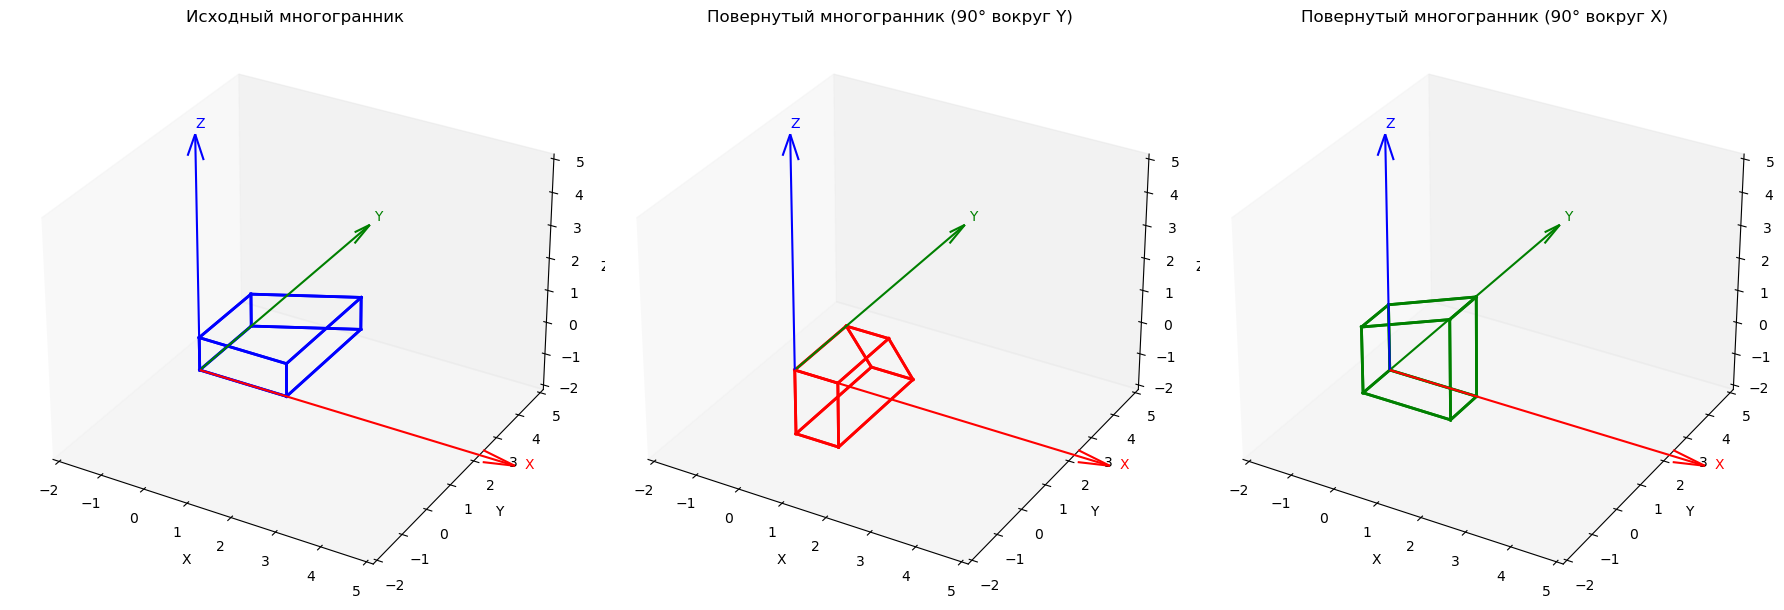

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import numpy as np

# Задаем вершины многогранника с дополнительной координатой
vertices = np.array([
    [0, 0, 1, 1],
    [2, 0, 1, 1],
    [2, 3, 1, 1],
    [0, 2, 1, 1],
    [0, 0, 0, 1],
    [2, 0, 0, 1],
    [2, 3, 0, 1],
    [0, 2, 0, 1]
])

# Определяем грани многогранника, каждая грань состоит из индексов вершин
faces = [
    [0, 1, 2, 3], 
    [1, 5, 6, 2],
    [5, 4, 7, 6], 
    [4, 0, 3, 7], 
    [4, 5, 1, 0], 
    [7, 3, 2, 6] 
]

print("Изначальный многогранник:\n", vertices)

# Функция для поворота многогранника
def rotate(vertices, angle, axis):
    theta = np.radians(angle)
    if axis == 'x':
        rotation_matrix = np.array([
            [1, 0, 0, 0],
            [0, np.cos(theta), -np.sin(theta), 0],
            [0, np.sin(theta), np.cos(theta), 0],
            [0, 0, 0, 1]
        ])
    elif axis == 'y':
        rotation_matrix = np.array([
            [np.cos(theta), 0, np.sin(theta), 0],
            [0, 1, 0, 0],
            [-np.sin(theta), 0, np.cos(theta), 0],
            [0, 0, 0, 1]
        ])
    elif axis == 'z':
        rotation_matrix = np.array([
            [np.cos(theta), -np.sin(theta), 0, 0],
            [np.sin(theta), np.cos(theta), 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1]
        ])
    else:
        raise ValueError("Axis must be 'x', 'y', or 'z'.")
    
    return vertices @ rotation_matrix.T

# Поворачиваем многогранник на 90 градусов вокруг оси Y
rotated_vertices = rotate(vertices, 90, 'y')
print("Повернутый многогранник (90, у):\n", rotated_vertices)

# Создаем фигуру с подграфиками
fig = plt.figure(figsize=(18, 6))

# График 1: Исходный многогранник
ax1 = fig.add_subplot(131, projection='3d')

#print("Вершины исходного многогранника:")
for face in faces:
    for i in range(len(face)):
        start = face[i]
        end = face[(i + 1) % len(face)]
        x_coords = vertices[[start, end], 0]
        y_coords = vertices[[start, end], 1]
        z_coords = vertices[[start, end], 2]
        #print(x_coords, y_coords, z_coords)
        ax1.plot(x_coords, y_coords, z_coords, color='b', linewidth=2)

ax1.set_title('Исходный многогранник')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_xlim([-2, 5])
ax1.set_ylim([-2, 5])
ax1.set_zlim([-2, 5])

# График 2: Повернутый многогранник
ax2 = fig.add_subplot(132, projection='3d')

#print("Вершины второго многогранника:")
for face in faces:
    for i in range(len(face)):
        start = face[i]
        end = face[(i + 1) % len(face)]
        x_coords = rotated_vertices[[start, end], 0]
        y_coords = rotated_vertices[[start, end], 1]
        z_coords = rotated_vertices[[start, end], 2]
        #print(x_coords, y_coords, z_coords)
        ax2.plot(x_coords, y_coords, z_coords, color='r', linewidth=2)

ax2.set_title('Повернутый многогранник (90° вокруг Y)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim([-2, 5])
ax2.set_ylim([-2, 5])
ax2.set_zlim([-2, 5])

# График 3
ax3 = fig.add_subplot(133, projection='3d')

y_rotated_vertices = rotate(vertices, 90, 'x')
print("Повернутый многогранник (90, х):\n", y_rotated_vertices)

#print("Вершины третьего многогранника:")
for face in faces:
    for i in range(len(face)):
        start = face[i]
        end = face[(i + 1) % len(face)]
        x_coords = y_rotated_vertices[[start, end], 0]
        y_coords = y_rotated_vertices[[start, end], 1]
        z_coords = y_rotated_vertices[[start, end], 2]
        #print(x_coords, y_coords, z_coords)
        ax3.plot(x_coords, y_coords, z_coords, color='g', linewidth=2)

ax3.set_title('Повернутый многогранник (90° вокруг X)')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.set_xlim([-2, 5])
ax3.set_ylim([-2, 5])
ax3.set_zlim([-2, 5])

# Добавляем оси координат для всех графиков
for ax in [ax1, ax2, ax3]:
    ax.quiver(0, 0, 0, 7, 0, 0, color='r', arrow_length_ratio=0.1)  # X
    ax.quiver(0, 0, 0, 0, 7, 0, color='g', arrow_length_ratio=0.1)  # Y
    ax.quiver(0, 0, 0, 0, 0, 7, color='b', arrow_length_ratio=0.1)  # Z
    ax.grid(False)
    ax.text(7.2, 0, 0, 'X', color='r')
    ax.text(0, 7.2, 0, 'Y', color='g')
    ax.text(0, 0, 7.2, 'Z', color='b')

# Показываем график
plt.tight_layout()
plt.show()


Изначальный многогранник:
 [[0 0 1 1]
 [2 0 1 1]
 [2 3 1 1]
 [0 2 1 1]
 [0 0 0 1]
 [2 0 0 1]
 [2 3 0 1]
 [0 2 0 1]]
Повернутый многогранник (90, уx):
 [[ 1.00000000e+00 -6.12323400e-17  3.74939946e-33  1.00000000e+00]
 [ 1.00000000e+00  2.00000000e+00 -1.22464680e-16  1.00000000e+00]
 [ 1.00000000e+00  2.00000000e+00  3.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  6.12323400e-17  2.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 1.22464680e-16  2.00000000e+00 -1.22464680e-16  1.00000000e+00]
 [ 1.22464680e-16  2.00000000e+00  3.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  1.22464680e-16  2.00000000e+00  1.00000000e+00]]
Повернутый многогранник (90, хy):
 [[ 6.12323400e-17 -1.00000000e+00  3.74939946e-33  1.00000000e+00]
 [ 1.83697020e-16 -1.00000000e+00 -2.00000000e+00  1.00000000e+00]
 [ 3.00000000e+00 -1.00000000e+00 -2.00000000e+00  1.00000000e+00]
 [ 2.00000000e+00 -1.00000000e+00  1.22464680e-16  1.00000000e+00]
 [ 0.0000

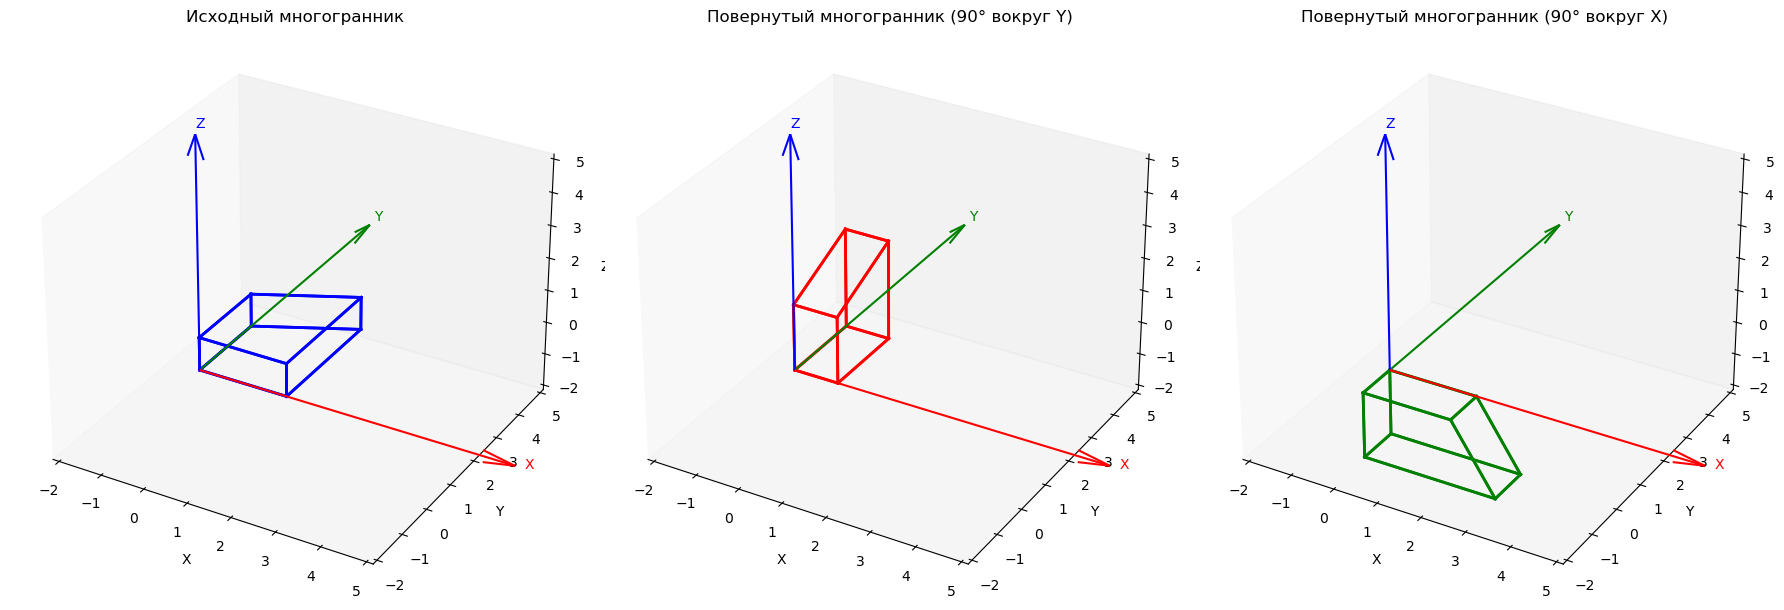

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import numpy as np

# Задаем вершины многогранника с дополнительной координатой
vertices = np.array([
    [0, 0, 1, 1],
    [2, 0, 1, 1],
    [2, 3, 1, 1],
    [0, 2, 1, 1],
    [0, 0, 0, 1],
    [2, 0, 0, 1],
    [2, 3, 0, 1],
    [0, 2, 0, 1]
])

# Определяем грани многогранника, каждая грань состоит из индексов вершин
faces = [
    [0, 1, 2, 3], 
    [1, 5, 6, 2],
    [5, 4, 7, 6], 
    [4, 0, 3, 7], 
    [4, 5, 1, 0], 
    [7, 3, 2, 6] 
]

print("Изначальный многогранник:\n", vertices)

# Функция для поворота многогранника
def rotate(vertices, angle, axis):
    theta = np.radians(angle)
    if axis == 'x':
        rotation_matrix = np.array([
            [1, 0, 0, 0],
            [0, np.cos(theta), -np.sin(theta), 0],
            [0, np.sin(theta), np.cos(theta), 0],
            [0, 0, 0, 1]
        ])
    elif axis == 'y':
        rotation_matrix = np.array([
            [np.cos(theta), 0, np.sin(theta), 0],
            [0, 1, 0, 0],
            [-np.sin(theta), 0, np.cos(theta), 0],
            [0, 0, 0, 1]
        ])
    elif axis == 'z':
        rotation_matrix = np.array([
            [np.cos(theta), -np.sin(theta), 0, 0],
            [np.sin(theta), np.cos(theta), 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1]
        ])
    else:
        raise ValueError("Axis must be 'x', 'y', or 'z'.")
    
    return vertices @ rotation_matrix.T

# Поворачиваем многогранник на 90 градусов вокруг оси Y
rotated_vertices = rotate(rotate(vertices, 90, 'y'), 90, 'x')
print("Повернутый многогранник (90, уx):\n", rotated_vertices)

# Создаем фигуру с подграфиками
fig = plt.figure(figsize=(18, 6))

# График 1: Исходный многогранник
ax1 = fig.add_subplot(131, projection='3d')

#print("Вершины исходного многогранника:")
for face in faces:
    for i in range(len(face)):
        start = face[i]
        end = face[(i + 1) % len(face)]
        x_coords = vertices[[start, end], 0]
        y_coords = vertices[[start, end], 1]
        z_coords = vertices[[start, end], 2]
        #print(x_coords, y_coords, z_coords)
        ax1.plot(x_coords, y_coords, z_coords, color='b', linewidth=2)

ax1.set_title('Исходный многогранник')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_xlim([-2, 5])
ax1.set_ylim([-2, 5])
ax1.set_zlim([-2, 5])

# График 2: Повернутый многогранник
ax2 = fig.add_subplot(132, projection='3d')

#print("Вершины второго многогранника:")
for face in faces:
    for i in range(len(face)):
        start = face[i]
        end = face[(i + 1) % len(face)]
        x_coords = rotated_vertices[[start, end], 0]
        y_coords = rotated_vertices[[start, end], 1]
        z_coords = rotated_vertices[[start, end], 2]
        #print(x_coords, y_coords, z_coords)
        ax2.plot(x_coords, y_coords, z_coords, color='r', linewidth=2)

ax2.set_title('Повернутый многогранник (90° вокруг Y)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim([-2, 5])
ax2.set_ylim([-2, 5])
ax2.set_zlim([-2, 5])

# График 3
ax3 = fig.add_subplot(133, projection='3d')

y_rotated_vertices = rotate(rotate(vertices, 90, 'x'), 90, 'y')
print("Повернутый многогранник (90, хy):\n", y_rotated_vertices)

#print("Вершины третьего многогранника:")
for face in faces:
    for i in range(len(face)):
        start = face[i]
        end = face[(i + 1) % len(face)]
        x_coords = y_rotated_vertices[[start, end], 0]
        y_coords = y_rotated_vertices[[start, end], 1]
        z_coords = y_rotated_vertices[[start, end], 2]
        #print(x_coords, y_coords, z_coords)
        ax3.plot(x_coords, y_coords, z_coords, color='g', linewidth=2)

ax3.set_title('Повернутый многогранник (90° вокруг X)')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.set_xlim([-2, 5])
ax3.set_ylim([-2, 5])
ax3.set_zlim([-2, 5])

# Добавляем оси координат для всех графиков
for ax in [ax1, ax2, ax3]:
    ax.quiver(0, 0, 0, 7, 0, 0, color='r', arrow_length_ratio=0.1)  # X
    ax.quiver(0, 0, 0, 0, 7, 0, color='g', arrow_length_ratio=0.1)  # Y
    ax.quiver(0, 0, 0, 0, 0, 7, color='b', arrow_length_ratio=0.1)  # Z
    ax.grid(False)
    ax.text(7.2, 0, 0, 'X', color='r')
    ax.text(0, 7.2, 0, 'Y', color='g')
    ax.text(0, 0, 7.2, 'Z', color='b')

# Показываем график
plt.tight_layout()
plt.show()


In [16]:
'''import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import numpy as np

# Задаем вершины многогранника с дополнительной координатой
vertices = np.array([
    [0, 0, 1, 1],
    [2, 0, 1, 1],
    [2, 3, 1, 1],
    [0, 2, 1, 1],
    [0, 0, 0, 1],
    [2, 0, 0, 1],
    [2, 3, 0, 1],
    [0, 2, 0, 1]
])

# Определяем грани многогранника, каждая грань состоит из индексов вершин
faces = [
    [0, 1, 2, 3], 
    [1, 5, 6, 2],
    [5, 4, 7, 6], 
    [4, 0, 3, 7], 
    [4, 5, 1, 0], 
    [7, 3, 2, 6] 
]

print("Изначальный многогранник: \n", vertices)

# Функция для поворота многогранника
def rotate(vertices, angle, axis):
    # Преобразуем угол в радианы
    theta = np.radians(angle)

    # Определяем матрицу поворота в зависимости от оси
    if axis == 'yx':
        rotation_matrix = np.array([
            [np.cos(theta), 0, -np.sin(theta), 0],
            [np.sin(theta)*np.sin(theta), np.cos(theta), np.cos(theta)*np.sin(theta), 0],
            [np.cos(theta)*np.sin(theta), -np.sin(theta), np.cos(theta)*np.cos(theta), 0],
            [0, 0, 0, 1]
        ])
    elif axis == 'xy':
        rotation_matrix = np.array([
            [np.cos(theta), np.sin(theta)*np.sin(theta), -np.cos(theta)*np.sin(theta), 0],
            [0, np.cos(theta), np.sin(theta), 0],
            [np.sin(theta), -np.cos(theta)*np.sin(theta), np.cos(theta)*np.cos(theta), 0],
            [0, 0, 0, 1]
        ])
    else:
        raise ValueError("Axis must be 'xy' or 'yx'.")

    # Умножаем матрицу поворота на вершины
    rotated_vertices = vertices @ rotation_matrix.T
    return rotated_vertices

# Поворачиваем многогранник на 45 градусов вокруг оси Z
rotated_vertices = rotate(vertices, 90, 'yx')

print("Повернутый многогранник:\n", rotated_vertices)

# Создаем фигуру с подграфиками
fig = plt.figure(figsize=(12, 6))

# График 1: Исходный многогранник
ax1 = fig.add_subplot(121, projection='3d')
for face in faces:
    for i in range(len(face)):
        start = face[i]
        end = face[(i + 1) % len(face)]  # следующее в списке, замыкаем цикл
        x_coords = vertices[[start, end], 0]
        y_coords = vertices[[start, end], 1]
        z_coords = vertices[[start, end], 2]
        ax1.plot(x_coords, y_coords, z_coords, color='b', linewidth=2)

ax1.set_title('Исходный многогранник')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_xlim([-2, 5])
ax1.set_ylim([-2, 5])
ax1.set_zlim([-2, 5])

# График 2: Повернутый многогранник
ax2 = fig.add_subplot(122, projection='3d')
for face in faces:
    for i in range(len(face)):
        start = face[i]
        end = face[(i + 1) % len(face)]  # следующее в списке, замыкаем цикл
        x_coords = rotated_vertices[[start, end], 0]
        y_coords = rotated_vertices[[start, end], 1]
        z_coords = rotated_vertices[[start, end], 2]
        ax2.plot(x_coords, y_coords, z_coords, color='r', linewidth=2)

ax2.set_title('Повернутый многогранник')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim([-2, 5])
ax2.set_ylim([-2, 5])
ax2.set_zlim([-2, 5])

ax2.set_axis_off()
ax1.set_axis_off()

# Добавляем оси координат
for ax in [ax1, ax2]:
    ax.plot([-10, 10], [0, 0], [0, 0], color='black', label="X")  # Ось X
    ax.annotate('X', xy=(350, 80), xycoords='axes points')
    ax.plot([0, 0], [-10, 10], [0, 0], color='black', label="Y")  # Ось Y
    ax.annotate('Y', xy=(250, 280), xycoords='axes points')
    ax.plot([0, 0], [0, 0], [-10, 10], color='black', label="Z")  # Ось Z
    ax.annotate('Z', xy=(105, 340), xycoords='axes points')

# Показываем график
plt.tight_layout()
plt.show()'''

'import matplotlib.pyplot as plt\nfrom mpl_toolkits.mplot3d.art3d import Line3DCollection\nimport numpy as np\n\n# Задаем вершины многогранника с дополнительной координатой\nvertices = np.array([\n    [0, 0, 1, 1],\n    [2, 0, 1, 1],\n    [2, 3, 1, 1],\n    [0, 2, 1, 1],\n    [0, 0, 0, 1],\n    [2, 0, 0, 1],\n    [2, 3, 0, 1],\n    [0, 2, 0, 1]\n])\n\n# Определяем грани многогранника, каждая грань состоит из индексов вершин\nfaces = [\n    [0, 1, 2, 3], \n    [1, 5, 6, 2],\n    [5, 4, 7, 6], \n    [4, 0, 3, 7], \n    [4, 5, 1, 0], \n    [7, 3, 2, 6] \n]\n\nprint("Изначальный многогранник: \n", vertices)\n\n# Функция для поворота многогранника\ndef rotate(vertices, angle, axis):\n    # Преобразуем угол в радианы\n    theta = np.radians(angle)\n\n    # Определяем матрицу поворота в зависимости от оси\n    if axis == \'yx\':\n        rotation_matrix = np.array([\n            [np.cos(theta), 0, -np.sin(theta), 0],\n            [np.sin(theta)*np.sin(theta), np.cos(theta), np.cos(theta)*np.s

Задание 3

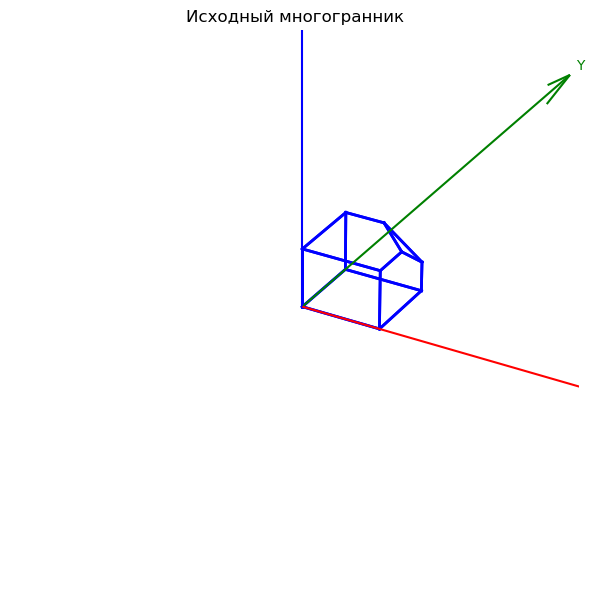

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import numpy as np

# Задаем вершины многогранника с дополнительной координатой
vertices = np.array([
    [0, 0, 1, 1],
    [1, 0, 1, 1],
    [1, 0.5, 1, 1],
    [0.5, 1, 1, 1],
    [0, 1, 1, 1],
    [0, 0, 0, 1],
    [1, 0, 0, 1],
    [1, 1, 0, 1],
    [0, 1, 0, 1],
    [1, 1, 0.5, 1]
])

# Определяем грани многогранника, каждая грань состоит из индексов вершин
faces = [
    [1, 6, 7, 9, 2],
    [9, 7, 8, 4, 3],
    [2, 9, 3],
    [1, 2, 3, 4, 0],
    [5, 8, 7, 6],
    [5, 6, 1, 0],
    [8, 5, 0, 4]
]

# Создаем фигуру с подграфиками
fig = plt.figure(figsize=(12, 6))

# График 1: Исходный многогранник
ax1 = fig.add_subplot(121, projection='3d')
for face in faces:
    for i in range(len(face)):
        start = face[i]
        end = face[(i + 1) % len(face)]  # следующее в списке, замыкаем цикл
        x_coords = vertices[[start, end], 0]
        y_coords = vertices[[start, end], 1]
        z_coords = vertices[[start, end], 2]
        ax1.plot(x_coords, y_coords, z_coords, color='b', linewidth=2)

ax1.set_title('Исходный многогранник')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_xlim([-2, 2])
ax1.set_ylim([-2, 2])
ax1.set_zlim([-2, 2])

ax1.set_axis_off()

# Добавляем оси координат
for ax in [ax1]:
    ax.quiver(0, 0, 0, 7, 0, 0, color='r', arrow_length_ratio=0.1)  # X
    ax.quiver(0, 0, 0, 0, 7, 0, color='g', arrow_length_ratio=0.1)  # Y
    ax.quiver(0, 0, 0, 0, 0, 7, color='b', arrow_length_ratio=0.1)  # Z
    ax.grid(False)
    ax.text(7.2, 0, 0, 'X', color='r')
    ax.text(0, 7.2, 0, 'Y', color='g')
    ax.text(0, 0, 7.2, 'Z', color='b')

# Показываем график
plt.tight_layout()
plt.show()